## アクション評価
#### T-DEEDを用いた結果のみ表示
- a_mAP: Spotの正しさも併せて評価
- Classification Bench: キーフレームを中心として、分類タスクにチャレンジ、Test Datasetを使用

### a_mAP
T-DEEDの場合、Test Dataのすべてをframe.jpgとして抽出する必要がある
Filter後の値を対象とする

### Ball-action Testで分類
Actionがあるポイントのみで評価を行う

#### a_mAP

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from pathlib import Path

# Function to clean labels
def clean_label(label):
    if label == 'loose_a_mAP'or label == 'tight_a_mAP':
        return label.replace('loose_', 'All Class_').replace('tight_', 'all_class_')
    label = label.replace('loose_', '').replace('tight_', '').replace('a_mAP_per_class_', '').replace('a_mAP', '')
    return label

def making_plot(target:str, fig_size = (7,4), legend_font = 5, experiment:str = 'ball_tuning_integrated', results_path_list: list = None):
    data_dir = Path("../../../data/team_location_detection/soccernet/england_efl/2019-2020")
    
    if target == 'action' or target == 'Action':
        if experiment == "T-DEED":
            experiment = "T-DEED"
        else:
            experiment = 'ball_tuning_integrated'
        fold = "fold_train"

    elif target == 'location' or target == 'Location':
        experiment = 'ball_tuning_location'
        fold = "fold_location_train"
    else:
        experiment = 'ball_tuning_team'
        fold = "fold_team_train"
    print(target)
    metric_path = os.path.join(data_dir, experiment, "test", fold)
    print(metric_path)
    at1_metrics = json.load(open(results_path_list[0]))
    at2_metrics = json.load(open(results_path_list[1]))
    print(at1_metrics)
    # # Cleaned labels
    # cleaned_at1_labels = {clean_label(label): value for label, value in at1_metrics.items()}
    # cleaned_at2_labels = {clean_label(label): value for label, value in at2_metrics.items()}
    # items = list(cleaned_at1_labels.items())
    # # アイテムを逆順に並べる
    # reversed_items = items[::-1]
    # # 逆順に並べたアイテムから新しい辞書を作成
    # cleaned_at1_labels = dict(reversed_items)
    # items = list(cleaned_at2_labels.items())
    # # アイテムを逆順に並べる
    # reversed_items = items[::-1]
    # # 逆順に並べたアイテムから新しい辞書を作成
    # cleaned_at2_labels = dict(reversed_items)

    # # Separate loose and tight values
    # loose_values = [cleaned_at1_labels[label] for label in cleaned_at1_labels]
    # tight_values = [cleaned_at2_labels[label] for label in cleaned_at2_labels]
    # x = np.arange(len(cleaned_at1_labels))  # the label locations
    
    # width = 0.35  # the width of the bars

    # fig, ax = plt.subplots(figsize=fig_size)
    # rects1 = ax.barh(x - width/2, loose_values, width, label='Loose', color='skyblue')
    # rects2 = ax.barh(x + width/2, tight_values, width, label='Tight', color='orange')

    # # Add some text for labels, title and custom x-axis tick labels, etc.
    # # 図を複数置けるようにする
    # ax.set_xlabel('a_mAP')
    # ax.set_title(f'a_mAP@1,2 per {target} Class')
    # ax.set_yticks(x)
    # ax.set_yticklabels(cleaned_at1_labels.keys())
    # ax.set_xlim(0, 1)
    # handles, labels = ax.get_legend_handles_labels()
    # order = [1, 0]

    # # 指定した順序で凡例を再設定
    # ax.legend([handles[i] for i in order], [labels[i] for i in order], loc= "upper right", fontsize =legend_font)
    # fig.tight_layout()
    # plt.show()


In [1]:
from evaluate import evaluate_predictions
experiment_list: list[str] = ["T-DEED"]
fold: str = "train"
challenge: bool = False
target: str = "label"
metrics: str = ["at1", "at2"]
for experiment in experiment_list:
    if experiment == "ball_tuning_integrated":
        prediction_file = "results_spotting_integrated.json"
    else:
        prediction_file = "results_spotting_my_filtered_integrated.json"
    results_list = []
    for metric in metrics:
        results = evaluate_predictions(experiment, fold, challenge, target, metric, prediction_file)
        results_list.append(results)
    # making_plot(target, fig_size = (7,4), legend_font = 5, experiment=experiment, results_path_list=results_path_list)

Evaluate predictions: experiment='T-DEED', fold='train', target='label', metric='at1'
Predictions path ../../../data/team_location_detection/soccernet
Evaluate games ['england_efl/2019-2020/2019-10-01 - Stoke City - Huddersfield Town', 'england_efl/2019-2020/2019-10-01 - Reading - Fulham']
{'PASS': 0, 'DRIVE': 1, 'HEADER': 2, 'HIGH PASS': 3, 'OUT': 4, 'CROSS': 5, 'THROW IN': 6, 'SHOT': 7, 'BALL PLAYER BLOCK': 8, 'PLAYER SUCCESSFUL TACKLE': 9, 'FREE KICK': 10, 'GOAL': 11}
num_calsses:12


100%|██████████| 2/2 [00:00<00:00, 18.85it/s]


len(labels) 1831
len(predictions) 2096
len(labels) 2106
len(predictions) 2475


100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


Average mAP@at1: 0.5532154279560814
Average mAP@at1 per event: [0.79017039 0.75506646 0.55489415 0.77613569 0.24576282 0.7287566
 0.72017187 0.57619048 0.25767045 0.05194805 1.         0.18181818]
Evaluate predictions: experiment='T-DEED', fold='train', target='label', metric='at2'
Predictions path ../../../data/team_location_detection/soccernet
Evaluate games ['england_efl/2019-2020/2019-10-01 - Stoke City - Huddersfield Town', 'england_efl/2019-2020/2019-10-01 - Reading - Fulham']
{'PASS': 0, 'DRIVE': 1, 'HEADER': 2, 'HIGH PASS': 3, 'OUT': 4, 'CROSS': 5, 'THROW IN': 6, 'SHOT': 7, 'BALL PLAYER BLOCK': 8, 'PLAYER SUCCESSFUL TACKLE': 9, 'FREE KICK': 10, 'GOAL': 11}
num_calsses:12


100%|██████████| 2/2 [00:00<00:00, 20.41it/s]


len(labels) 1831
len(predictions) 2096
len(labels) 2106
len(predictions) 2475


100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

Average mAP@at2: 0.5732310344796229
Average mAP@at2 per event: [0.78413974 0.77730412 0.561717   0.78269872 0.44248468 0.739279
 0.72017187 0.57619048 0.26102058 0.05194805 1.         0.18181818]


## Location & Team 多値分類

In [5]:
import os
import json
from collections import defaultdict
from sklearn.metrics import classification_report

test_game = ["2019-10-01 - Stoke City - Huddersfield Town", "2019-10-01 - Reading - Fulham"]
ans_dir = "../../../data/team_location_detection/soccernet/england_efl/2019-2020"
pred_dir = ans_dir
loc_acc = defaultdict(lambda: 0)
team_acc = defaultdict(lambda: 0)

loc_pred = defaultdict(lambda: 0)
loc_ans = defaultdict(lambda: 0)

team_pred = defaultdict(lambda: 0)
team_ans = defaultdict(lambda: 0)

loc_pred_list = []
loc_ans_list = []
loc2_pred_list = []
loc2_ans_list = []
loc_class_list = ["Right top corner", "Right bottom corner", "Right top box", "Right bottom box", "Right edge of the box", "Right center midfield", "Right top midfield", "Right bottom midfield", "Left top corner", "Left bottom corner", "Left top box", "Left bottom box", "Left edge of the box", "Left center midfield", "Left top midfield", "Left bottom midfield", "OUT"]

team_pred_list = []
team_ans_list = []
team_class_list = ["right", "left"]
for game in test_game:
    pred_path = os.path.join(pred_dir, game, "train", "results_spotting_eval_integrated2.json")
    ans_path = os.path.join(ans_dir, game, "Labels-ball-location-team.json")
    with open(pred_path, "r") as f:
        pred = json.load(f)
        pred = pred["predictions"]
    with open(ans_path, "r") as f:
        ans = json.load(f)
        ans = ans["annotations"]
        if int((int(ans[0]["position"]) /1000) * 25) < 15:
            ans = ans[1:]
    print(len(pred), len(ans))
    assert len(pred) == len(ans)

    for pred_event, ans_event in zip(pred, ans):
        if pred_event["location"] == "0":
            pred_event["location"] = "OUT"
        if ans_event["location"] == "0":
            ans_event["location"] = "OUT"
        loc_pred_index = loc_class_list.index(pred_event["location"])
        loc_ans_index = loc_class_list.index(ans_event["location"])
        loc_pred_list.append(loc_pred_index)
        loc_ans_list.append(loc_ans_index)
        loc_ans[ans_event["location"]] += 1
        if pred_event["location"] == ans_event["location"]:
            loc_pred[pred_event["location"]] += 1
            
        if ans_event["location"] == "0":
            ans_event["location"] = "OUT"
        if pred_event["location2"] == "0":
            pred_event["location2"] = "OUT"
        loc2_pred_index = loc_class_list.index(pred_event["location2"])
        loc2_ans_index = loc_class_list.index(ans_event["location"])
        loc2_pred_list.append(loc2_pred_index)
        loc2_ans_list.append(loc2_ans_index)
        loc_ans[ans_event["location"]] += 1
        if pred_event["location2"] == ans_event["location"]:
            loc_pred[pred_event["location2"]] += 1
        
        if ans_event["location"] == "OUT":
            continue
        team_pred_index = team_class_list.index(pred_event["team"])
        team_ans_index = team_class_list.index(ans_event["team"])
        team_pred_list.append(team_pred_index)
        team_ans_list.append(team_ans_index)
        team_ans[ans_event["team"]] += 1
        if pred_event["team"] == ans_event["team"]:
            team_pred[pred_event["team"]] += 1

loc_classification_report = classification_report(loc_ans_list, loc_pred_list, target_names=loc_class_list)
print("Ball Location classification report")
print(loc_classification_report) 

loc2_classification_report = classification_report(loc2_ans_list, loc2_pred_list, target_names=loc_class_list)
print("Ball Location2 classification report")
print(loc2_classification_report)

team_classification_report = classification_report(team_ans_list, team_pred_list, target_names=team_class_list)
print("Team classification report")
print(team_classification_report)           

for loc in loc_ans.keys():
    loc_acc[loc] += loc_pred[loc] / loc_ans[loc]
for team in team_ans.keys():
    team_acc[team] += team_pred[team] / team_ans[team]

loc_avg = 0
team_avg = 0
for loc in loc_acc.keys():
    loc_avg += loc_acc[loc]
for team in team_acc.keys():
    team_avg += team_acc[team]
loc_avg /= len(loc_acc)
team_avg /= len(team_acc)
loc_acc["average"] = loc_avg
team_acc["average"] = team_avg
print("Location accuracy")
print(loc_acc)
# center midfieldの平均
loc_avg_dict = {}
loc_avg_dict["center mid field average"] = (loc_acc["Left center midfield"] + loc_acc["Right center midfield"]) / 2
loc_avg_dict["top mid field average"] = (loc_acc["Left top midfield"] + loc_acc["Right top midfield"]) / 2
loc_avg_dict["bottom mid field average"] = (loc_acc["Left bottom midfield"] + loc_acc["Right bottom midfield"]) / 2
loc_avg_dict["top corner average"] = (loc_acc["Left top corner"] + loc_acc["Right top corner"]) / 2
loc_avg_dict["bottom corner average"] = (loc_acc["Left bottom corner"] + loc_acc["Right bottom corner"]) / 2
loc_avg_dict["top box average"] = (loc_acc["Left top box"] + loc_acc["Right top box"]) / 2
loc_avg_dict["bottom box average"] = (loc_acc["Left bottom box"] + loc_acc["Right bottom box"]) / 2
loc_avg_dict["edge of the box average"] = (loc_acc["Left edge of the box"] + loc_acc["Right edge of the box"]) / 2
loc_avg_dict["OUT"] = loc_acc["0"]
loc_avg_dict["average"] = loc_avg
print("Location average")
print(loc_avg_dict)
print("Team accuracy")
print(team_acc)


1831 1831
2106 2106
Ball Location classification report
                       precision    recall  f1-score   support

     Right top corner       0.82      0.45      0.58        60
  Right bottom corner       0.87      0.82      0.85       130
        Right top box       0.68      0.79      0.73        75
     Right bottom box       0.81      0.80      0.81        97
Right edge of the box       0.78      0.81      0.80        86
Right center midfield       0.83      0.89      0.86       692
   Right top midfield       0.92      0.71      0.80       330
Right bottom midfield       0.82      0.76      0.79       343
      Left top corner       0.78      0.64      0.70       108
   Left bottom corner       0.88      0.70      0.78        70
         Left top box       0.69      0.78      0.74        87
      Left bottom box       0.82      0.63      0.71       102
 Left edge of the box       0.76      0.79      0.78       111
 Left center midfield       0.78      0.96      0.86       78

2019-10-01 - Blackburn Rovers - Nottingham Forest
the number of labels:  1893
2019-10-01 - Brentford - Bristol City
the number of labels:  1813
2019-10-01 - Hull City - Sheffield Wednesday
the number of labels:  1499
2019-10-01 - Leeds United - West Bromwich
the number of labels:  1553
2019-10-01 - Middlesbrough - Preston North End
the number of labels:  1564
2019-10-01 - Reading - Fulham
the number of labels:  2106
2019-10-01 - Stoke City - Huddersfield Town
the number of labels:  1831
Total
the number of labels:  12259
action dic
defaultdict(<function <lambda> at 0x7f7ac531c670>, {'PASS': 4916, 'DRIVE': 4270, 'HIGH PASS': 717, 'HEADER': 705, 'CROSS': 259, 'SHOT': 169, 'BALL PLAYER BLOCK': 222, 'OUT': 551, 'THROW IN': 340, 'PLAYER SUCCESSFUL TACKLE': 76, 'FREE KICK': 21, 'GOAL': 13})
location dic
defaultdict(<function <lambda> at 0x7f7b3845f400>,
            {'0': 575,
             'Left bottom box': 293,
             'Left bottom corner': 260,
             'Left bottom midfield': 985

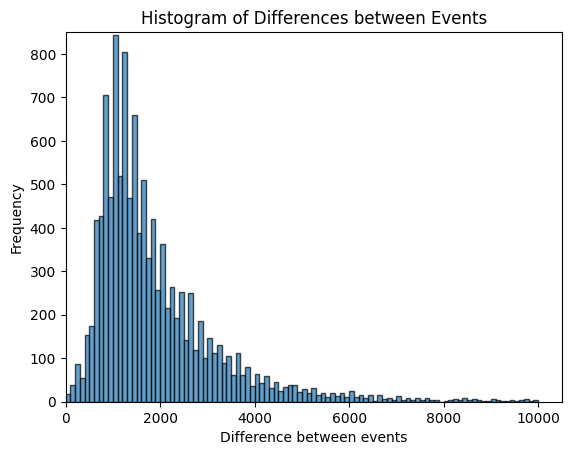

In [2]:
from collections import defaultdict
import json
import os
from pathlib import Path
# Load the labels
label_dir = Path("/home/ilabnas3/tanaka/archive/event_detection/data/team_location_detection/soccernet/england_efl/2019-2020")
action_dic = defaultdict(lambda: 0)
loc_dic = defaultdict(lambda: 0)
team_dic = defaultdict(lambda: 0)
event_dic = defaultdict(lambda: defaultdict(lambda: 0))
mid_event_dic = defaultdict(lambda: defaultdict(lambda: 0))
two_event_dic = defaultdict(lambda: 0)
diff_list = []
t = 0
k =0
sum_label = 0
for game_file in os.listdir(label_dir):
    if game_file == "test_720p_frames" or game_file == "first_results":
        continue
    if "json" in game_file:
        continue
    print(game_file)
    label_path = os.path.join(label_dir, game_file, "Labels-ball-location-team.json")
    with open(label_path, "r") as f:
        label = json.load(f)
        label = label["annotations"]
    print("the number of labels: ", len(label))
    sum_label += len(label)
    for i, event in enumerate(label):
        action = event["label"]
        loc = event["location"]
        team = event["team"]
        action_dic[action] += 1
        loc_dic[loc] += 1
        team_dic[team] += 1
        
        if i == 0:
            prev_position = int(event["position"])
            prev_action = action
        else:
            diff = int(event["position"]) - prev_position
            diff_list.append(diff)
            if diff <= 600:
                t += 1
                event_dic[prev_action][action] += 1
            elif 600< diff <= 1000:
                k += 1
                mid_event_dic[prev_action][action] += 1
                
            if prev_action == action:
                two_event_dic[prev_action] += 1
            prev_position = int(event["position"])
            prev_action = action
        
        
from pprint import pprint
from collections import Counter
from matplotlib import pyplot as plt
print("Total")
print("the number of labels: ", sum_label)
print("action dic")
print(action_dic)
print("location dic")
pprint(loc_dic)
print("team dic")
print(team_dic)

print("event dic")
pprint(event_dic)
print("the number of labels <= 600: ", t)
print("mid event dic")
pprint(mid_event_dic)
print("the number of labels <= 1000: ", k)
print("two event dic")
pprint(two_event_dic)
# ヒストグラムを描画
plt.hist(diff_list, bins=100, range=(0, 10000), alpha=0.7, edgecolor='black')
plt.xlabel('Difference between events')
plt.ylabel('Frequency')
plt.title('Histogram of Differences between Events')
plt.xlim(0, 10500)  # x軸の範囲を指定
plt.ylim(0, 850)  # y軸の範囲を指定
plt.show()


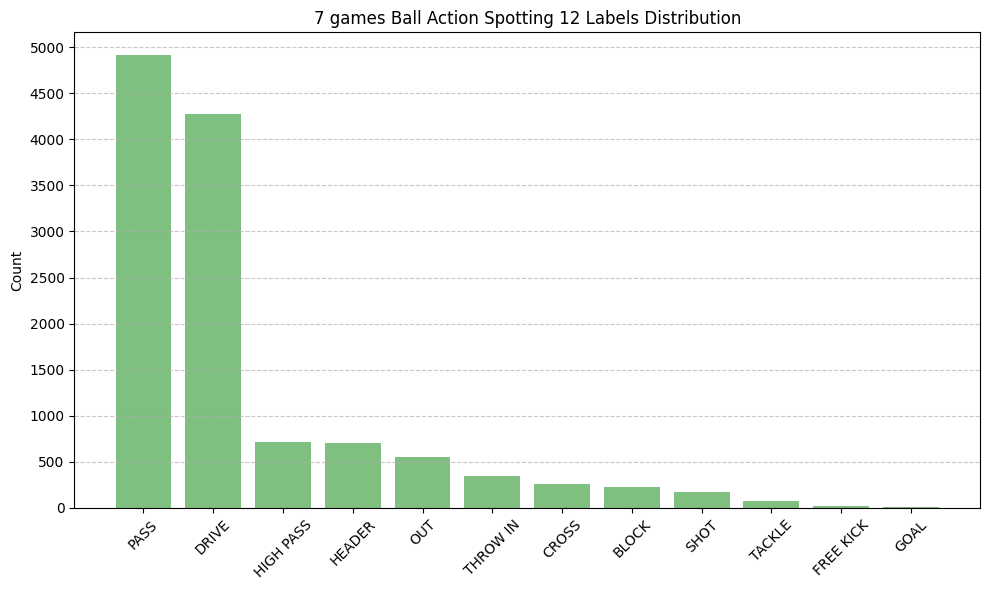

In [ ]:
#plot action dic
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
action_dic = {'PASS': 4916, 'DRIVE': 4270, 'HIGH PASS': 717, 'HEADER': 705, 'CROSS': 259, 'SHOT': 169, 'BLOCK': 222, 'OUT': 551, 'THROW IN': 340, 'TACKLE': 76, 'FREE KICK': 21, 'GOAL': 13}

action_dic = dict(sorted(action_dic.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 6))
plt.bar(action_dic.keys(), action_dic.values(), color='green', alpha=0.5)
plt.ylabel('Count')
plt.title('7 games Ball Action Spotting 12 Labels Distribution')
plt.xticks(rotation=45)
#x軸の文字を小さく
plt.xticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 500ごとにy軸の目盛りを表示
plt.yticks(np.arange(0, max(action_dic.values()) + 500, 500))
plt.tight_layout()
plt.show()

ball_tuning_location_easy
[0.12071501487183077, 0.0873584253885783, 0.08366938949616942, 0.07403051529832497, 0.05645064441397946, 0.053623849923877746, 0.04976686422653933, 0.04991516439184003, 0.048976407978838905, 0.0455532706711287, 0.046710651576286163, 0.04416742695206381, 0.04590811818874975, 0.04254892890417728, 0.042368078423770716, 0.03996710956291157, 0.03912434414004875, 0.0372090419735807, 0.03581390074626444, 0.036190379305080615, 0.0330858348853992, 0.03230337296302609, 0.03325814122510913, 0.03190384258706752, 0.03112867062713967, 0.03071678618713244, 0.03143957315899744]
[0.05084827535970628, 0.054776564034011925, 0.056119296317690824, 0.053322686416962244, 0.05184263619648241, 0.0547638388426603, 0.05975360873105349, 0.054078427530583846, 0.0571125165701596, 0.0584508120851226, 0.06205322681763189, 0.05848959815673772, 0.05775738004429798, 0.05930312278665537, 0.06325803528647538, 0.06057452385280238, 0.057947120003016286, 0.06175780693631116, 0.061303735821457414, 0.

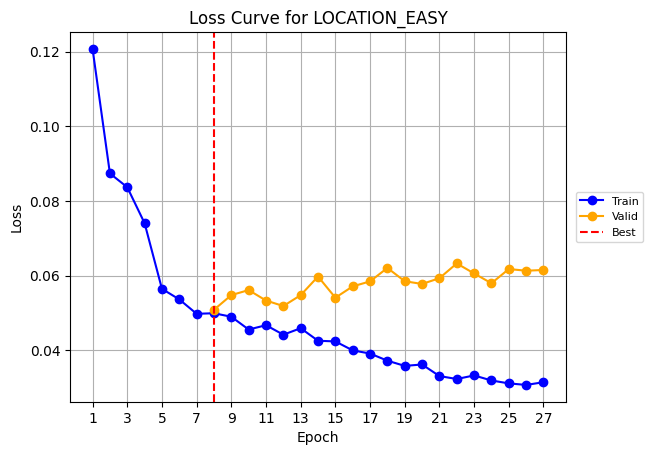

ball_tuning_location_hard
[0.08785499139456084, 0.05052509643215065, 0.04142453725537057, 0.034070233515619, 0.030233432060083377, 0.0290037603348804, 0.02794019776258691, 0.027028878983556413, 0.025838515262834906, 0.02432800468504502, 0.023547762908157924, 0.023370892608499443, 0.02257036866282455, 0.021416519713088465, 0.020863805725880678, 0.020165736373897118, 0.018735370253644506, 0.018956635260521795, 0.017837436813422702, 0.017600645744212683, 0.017060798225169493, 0.016288165966387547, 0.016233112734512074, 0.01564782842958192, 0.01536201121692574, 0.015180378747928009, 0.014312568948692069]
[0.0333147488377243, 0.031609321678088075, 0.032894267149522476, 0.03217989455096921, 0.030658736107885824, 0.03195981657752007, 0.031617387678311265, 0.029641094686333802, 0.027771895137744782, 0.028798371260284266, 0.03054594286960504, 0.031727298563123896, 0.031786223331074386, 0.03218878176108175, 0.032834131773433334, 0.03181980645880723, 0.034941710912552076, 0.03514371992519645, 0.0

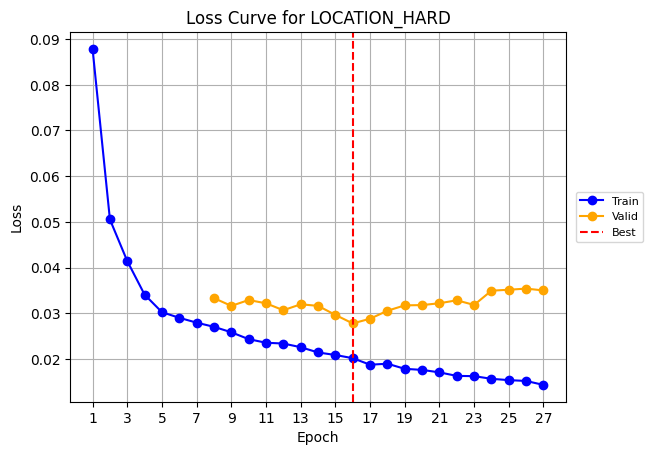

ball_tuning_location
[0.07087010089370098, 0.03217022377159439, 0.028300202325064045, 0.024988372315439194, 0.023278895512989662, 0.022421845156088215, 0.021082621765710984, 0.019513731893564312, 0.01720121112849057, 0.016141141195688172, 0.015468139963000182, 0.014671101843567172, 0.014046816259125378, 0.013387727414328171, 0.013104556882887365, 0.012140071563728283, 0.011532930827666247, 0.011412106748090652, 0.010661610098216137, 0.010294784966934473, 0.010364602072447548, 0.009763124608518458, 0.009555705516225019, 0.009648169052584624, 0.009489043257612743, 0.008984451582538884, 0.008919808968538704]
[0.025819667308475812, 0.021392270114675965, 0.02085336651060551, 0.020493624619800168, 0.0195385241280923, 0.019637867316554255, 0.019533634885176163, 0.019771034175077796, 0.019735340751628534, 0.01924663813220283, 0.019026831806641584, 0.018784346634039866, 0.01927701241125911, 0.01952693400603038, 0.01904277745778439, 0.019043596092816403, 0.019233698174554115, 0.01903569739259607

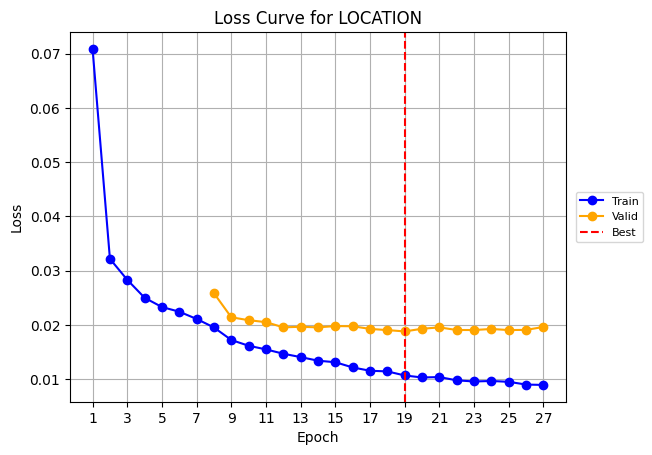

ball_tuning_team
[0.14541783120979868, 0.11748490563430819, 0.11360108565356747, 0.11015343165069733, 0.10641072321041914, 0.10372062870076222, 0.10091168856990392, 0.09772286862747548, 0.09466873960513213, 0.08903504569262906, 0.08788611655310749, 0.08477584610873609, 0.08156445800268568, 0.08000261123089893, 0.07467353346368563, 0.07579942249488525, 0.07389957099603628, 0.06976082732718841, 0.06733857443778125, 0.06417000609837106, 0.06343150147391062, 0.056092089564083646, 0.055984479331343505, 0.0577996855635974, 0.05732982201883589, 0.055630546856644994, 0.05608639378546296]
[0.13964985615180037, 0.13240830682236823, 0.13267535053423254, 0.1373641677369557, 0.13165426143884942, 0.12862871144198948, 0.1347112975889604, 0.1337110210693326, 0.13526479068202243, 0.14506756020243025, 0.14868037963894298, 0.14893555439535552, 0.14881445948872876, 0.1594492134686375, 0.17901634563597277, 0.1815286333863097, 0.17704567542014318, 0.17384694060595415, 0.17549856912552253, 0.1829749544410910

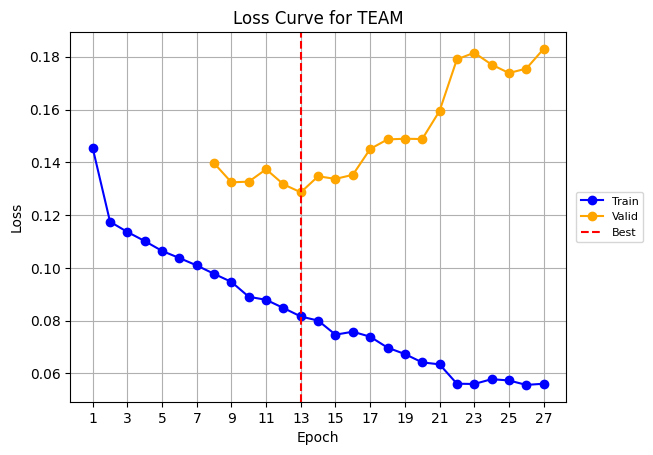

In [ ]:
from pathlib import Path
import os
from matplotlib import pyplot as plt
import numpy as np
experiment_dir = Path("/home/ilabnas3/tanaka/archive/event_detection/data/team_location_detection/experiments")
experiment_list = ["ball_tuning_location_easy", "ball_tuning_location_hard", "ball_tuning_location", "ball_tuning_team"]
train_epoch = 7
valid_epoch = 27
for experiment in experiment_list:
    print(experiment)
    fold_name = "_".join(experiment.split("_")[-2:])
    if experiment == "ball_tuning_location":
        fold_name = "location"
    elif experiment == "ball_tuning_team":
        fold_name = "team"
    csv_path = os.path.join(experiment_dir, experiment, f"fold_{fold_name}_train", "log4.csv")
    with open(csv_path, "r") as f:
        lines = f.readlines()
    train_lines = lines[1:train_epoch+1]
    train_loss = [float(line.split(",")[3].replace("\n", "")) for line in train_lines]
    valid_lines = lines[train_epoch+1:valid_epoch+2]
    train_loss2 = [float(line.split(",")[3]) for line in valid_lines if not "train_loss" in line]
    train_loss = train_loss + train_loss2
    print(train_loss)
    valid_loss = [float(line.split(",")[4]) for line in valid_lines if not "train_loss" in line]
    print(valid_loss)
    print(len(train_loss), len(valid_loss))
    
    # Plot the training and validation loss on the same graph
    train_index = np.arange(len(train_loss))+1
    valid_index = np.arange(len(valid_loss))+8
    plt.plot(train_index, train_loss, label='Train', color='blue', marker='o')
    plt.plot(valid_index, valid_loss, label='Valid', color='orange', marker='o')
    # x軸2ずつ
    # validで最も小さい値に縦線
    min_valid_loss = min(valid_loss)
    min_valid_index = valid_loss.index(min_valid_loss) + 8
    plt.axvline(x=min_valid_index, color='red', linestyle='--', label='Best')
    plt.xticks(np.arange(1, len(train_loss)+2, 2))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve for {fold_name.upper()}')
    plt.legend(bbox_to_anchor=(1.02, .5), loc="center left",borderaxespad=0, fontsize=8)
    plt.grid()
    plt.show()
